In [ ]:
/kaggle/input/nandolal-hand-paintings/Nandolal_data.csv
/kaggle/input/nandolal-hand-paintings/IMAGES/img9073.jpg

In [1]:
!pip install -q torch torchvision transformers diffusers accelerate peft bitsandbytes pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 10.4 MB/s eta 0:00:00:00:0100:01
ERROR: pip's de

In [12]:
import pandas as pd 

df = pd.read_csv("/kaggle/input/processed-metadata-final-new/processed_metadata_final_new.csv")
# df.info()
df.shape

(2860, 46)

In [13]:
df.dropna(subset=['visual_description'], inplace=True)


base_path = "/kaggle/input/nandolal-hand-paintings/IMAGES/"

df["kaggle_image_path"] = base_path + df["filename"].astype(str)
df.shape

(1012, 47)

In [14]:
df.to_csv("processed_metadata_final_new.csv", index=False)


In [8]:
df.sample(1)

# df["image_detail"] = df['image_title']+ " " + df['visual_description']

,filename,source_url,image_url,row_index,sub_index,file_path,download_status,file_size,image_title,total_image,...,inscriptions_text,author_name,author_signature_position,has_personal_seal,seal_description,time_period,summary,exhibition_location,visual_description,kaggle_image_path
193,img390.jpg,https://indianculture.gov.in/museum-paintings/...,https://indianculture.gov.in/system/files/digi...,390,1,downloaded_images1\img390.jpg,success,201584,A Landscape,1.0,...,"29 64 Nanda, Shanivar",Nandalal Bose,vertically in the top-right corner of the pain...,True,in red,last phase of his life,This painting belongs to a series of monochrom...,"National Gallery of Modern Art, New Delhi","monochromatic ink and watercolour paintings, s...",/kaggle/input/nandolal-hand-paintings/IMAGES/i...


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1014
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   filename                                  1012 non-null   object 
 1   source_url                                1012 non-null   object 
 2   image_url                                 1012 non-null   object 
 3   row_index                                 1012 non-null   int64  
 4   sub_index                                 1012 non-null   int64  
 5   file_path                                 1012 non-null   object 
 6   download_status                           1012 non-null   object 
 7   file_size                                 1012 non-null   int64  
 8   image_title                               1012 non-null   object 
 9   total_image                               1012 non-null   float64
 10  Image URL                                

In [2]:
!pip install -q protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, bu

In [ ]:
from huggingface_hub import login

login(token="bCfNo")

In [1]:
!pip install -q torch torchvision transformers diffusers accelerate peft bitsandbytes pandas
!pip install -q protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 33.0 MB/s eta 0:00:00:00:0100:01
ERROR: pip's de

In [2]:
import os
import pandas as pd
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn.functional as F
from accelerate import Accelerator
from diffusers import DDPMScheduler, UNet2DConditionModel, AutoencoderKL
from transformers import CLIPTokenizer, CLIPTextModel
from peft import LoraConfig, get_peft_model
from tqdm.auto import tqdm
import gc

# --- Configuration ---
# 1. Base Model Path (Hugging Face Hub ID)
MODEL_NAME = "stable-diffusion-v1-5/stable-diffusion-v1-5" 

# 2. Data Paths (Kaggle Specific)
INSTANCE_DIR = "/kaggle/input/nandolal-hand-paintings/IMAGES"
INSTANCE_CSV = "/kaggle/input/clean-nandolan-new-1-1000/processed_metadata_final_new_1-1000.csv"

# 3. Output Path (Using Absolute Path to prevent Errors)
OUTPUT_DIR = os.path.abspath("/kaggle/working/lora_output_nandolal")

# 4. Hyperparameters
RESOLUTION = 512
BATCH_SIZE = 1
LEARNING_RATE = 1e-4
TRAIN_STEPS = 1000 

# --- create output directory explicitly ---
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output Directory set to: {OUTPUT_DIR}")

# --- Dataset Class ---
class DreamBoothTextImgDataset(Dataset):
    def __init__(
        self,
        instance_data_root,
        instance_prompt_csv,
        tokenizer,
        size=512,
        center_crop=False,
        color_jitter=False,
    ):
        self.size = size
        self.center_crop = center_crop
        self.tokenizer = tokenizer
        self.instance_data_root = Path(instance_data_root)
        
        if not self.instance_data_root.exists():
            raise ValueError(f"Instance images root doesn't exist: {self.instance_data_root}")

        self.df = pd.read_csv(instance_prompt_csv)
        self._length = len(self.df)

        self.image_transforms = transforms.Compose(
            [
                transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR),
                transforms.CenterCrop(size) if center_crop else transforms.RandomCrop(size),
                transforms.ColorJitter(0.2, 0.1) if color_jitter else transforms.Lambda(lambda x: x),
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5]),
            ]
        )

    def __len__(self):
        return self._length

    def __getitem__(self, index):
        example = {}
        row = self.df.iloc[index]
        
        # Handle path joining robustly
        image_path_from_csv = row['kaggle_image_path']
        prompt = row['image_title']
        
        img_path = os.path.join(self.instance_data_root, image_path_from_csv)
        
        try:
            instance_image = Image.open(img_path)
        except Exception as e:
            raise ValueError(f"Could not open image at {img_path}") from e
        
        if not instance_image.mode == "RGB":
            instance_image = instance_image.convert("RGB")

        example["instance_images"] = self.image_transforms(instance_image)
        example["instance_prompt_ids"] = self.tokenizer(
            prompt,
            padding="max_length",
            truncation=True,
            max_length=self.tokenizer.model_max_length,
            return_tensors="pt"
        ).input_ids[0]

        return example

2025-12-01 12:29:51.871869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764592192.079277      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764592192.142358      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Output Directory set to: /kaggle/working/lora_output_nandolal


In [3]:
def train_lora_model():
    print("--- Initializing Training ---")
    accelerator = Accelerator(gradient_accumulation_steps=1)

    # 1. Load Components
    tokenizer = CLIPTokenizer.from_pretrained(MODEL_NAME, subfolder="tokenizer")
    noise_scheduler = DDPMScheduler.from_pretrained(MODEL_NAME, subfolder="scheduler")
    text_encoder = CLIPTextModel.from_pretrained(MODEL_NAME, subfolder="text_encoder")
    vae = AutoencoderKL.from_pretrained(MODEL_NAME, subfolder="vae")
    unet = UNet2DConditionModel.from_pretrained(MODEL_NAME, subfolder="unet")

    # 2. Freeze parameters
    vae.requires_grad_(False)
    text_encoder.requires_grad_(False)
    unet.requires_grad_(False)

    # 3. Inject LoRA into UNet
    lora_config = LoraConfig(
        r=4,
        lora_alpha=4,
        init_lora_weights="gaussian",
        target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    )
    unet = get_peft_model(unet, lora_config)
    
    if accelerator.is_main_process:
        unet.print_trainable_parameters()

    # 4. Dataset & Dataloader
    dataset = DreamBoothTextImgDataset(
        instance_data_root=INSTANCE_DIR,
        instance_prompt_csv=INSTANCE_CSV,
        tokenizer=tokenizer,
        size=RESOLUTION
    )
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # 5. Optimizer
    optimizer = torch.optim.AdamW(unet.parameters(), lr=LEARNING_RATE)

    # 6. Prepare with Accelerator
    unet, optimizer, dataloader = accelerator.prepare(unet, optimizer, dataloader)
    
    # Move static models to device
    weight_dtype = torch.float32 
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
        
    text_encoder.to(accelerator.device, dtype=weight_dtype)
    vae.to(accelerator.device, dtype=weight_dtype)

    # 7. Training Loop
    global_step = 0
    progress_bar = tqdm(range(TRAIN_STEPS), disable=not accelerator.is_local_main_process)
    unet.train()

    print("Starting training steps...")
    
    while global_step < TRAIN_STEPS:
        for batch in dataloader:
            with accelerator.accumulate(unet):
                # Convert images to latent space
                latents = vae.encode(batch["instance_images"].to(dtype=weight_dtype)).latent_dist.sample()
                latents = latents * vae.config.scaling_factor

                # Sample noise
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device)
                timesteps = timesteps.long()

                # Add noise to latents
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get text embeddings
                encoder_hidden_states = text_encoder(batch["instance_prompt_ids"])[0]

                # Predict noise
                model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample

                # Compute loss
                target = noise
                loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                accelerator.backward(loss)
                optimizer.step()
                optimizer.zero_grad()

            if accelerator.sync_gradients:
                global_step += 1
                progress_bar.update(1)
            
            if global_step >= TRAIN_STEPS:
                break

    # 8. Save the LoRA weights
    if accelerator.is_main_process:
        print("Saving model...")
        unwrapped_unet = accelerator.unwrap_model(unet)
        unwrapped_unet.save_pretrained(OUTPUT_DIR)
        print(f"Model saved to {OUTPUT_DIR}")
        
    # Cleanup to free VRAM for inference
    del unet, vae, text_encoder, optimizer
    torch.cuda.empty_cache()
    gc.collect()

--- Initializing Training ---


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

trainable params: 797,184 || all params: 860,318,148 || trainable%: 0.0927


  0%|          | 0/1000 [00:00<?, ?it/s]

Starting training steps...
Saving model...
Model saved to /kaggle/working/lora_output_nandolal
--- Starting Inference ---
Looking for LoRA weights in: /kaggle/working/lora_output_nandolal


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

No LoRA keys associated to UNet2DConditionModel found with the prefix='unet'. This is safe to ignore if LoRA state dict didn't originally have any UNet2DConditionModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Successfully loaded adapter_model.safetensors
Generating for prompt: A painting of a village scene in the style of Nandolal


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved to generated_result.png


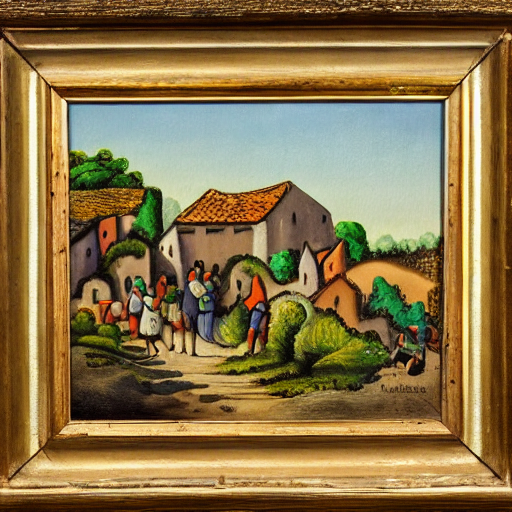

In [4]:
from diffusers import StableDiffusionPipeline

# 1. Run the training
train_lora_model()

# 2. Define Robust Inference Function
def generate_image(prompt, model_path, output_path, lora_path):
    # Resolve absolute path to avoid "Repo ID" errors
    lora_abs_path = os.path.abspath(lora_path)
    
    print(f"--- Starting Inference ---")
    print(f"Looking for LoRA weights in: {lora_abs_path}")

    # Load Base Model
    pipe = StableDiffusionPipeline.from_pretrained(
        model_path, 
        torch_dtype=torch.float16
    ).to("cuda")

    # Determine weight name (bin or safetensors)
    weight_name = "adapter_model.bin"
    if os.path.exists(os.path.join(lora_abs_path, "adapter_model.safetensors")):
        weight_name = "adapter_model.safetensors"

    # Load LoRA
    try:
        pipe.load_lora_weights(lora_abs_path, weight_name=weight_name)
        print(f"Successfully loaded {weight_name}")
    except Exception as e:
        print(f"Error loading weights: {e}")
        return

    # Generate
    print(f"Generating for prompt: {prompt}")
    image = pipe(
        prompt, 
        num_inference_steps=30, 
        guidance_scale=7.5
    ).images[0]

    # Save
    image.save(output_path)
    print(f"Image saved to {output_path}")
    
    # Display (if in Jupyter)
    try:
        display(image)
    except NameError:
        pass # Not in Jupyter

# 3. Execute Generation
my_prompt = "A bird style of Nandolal"

generate_image(
    prompt=my_prompt, 
    model_path=MODEL_NAME, 
    output_path="generated_result.png", 
    lora_path=OUTPUT_DIR
)

--- Starting Inference ---
Looking for LoRA weights in: /kaggle/working/lora_output_nandolal


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

No LoRA keys associated to UNet2DConditionModel found with the prefix='unet'. This is safe to ignore if LoRA state dict didn't originally have any UNet2DConditionModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Successfully loaded adapter_model.safetensors
Generating for prompt: A bird in nandolal basu atyle


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved to generated_result.png


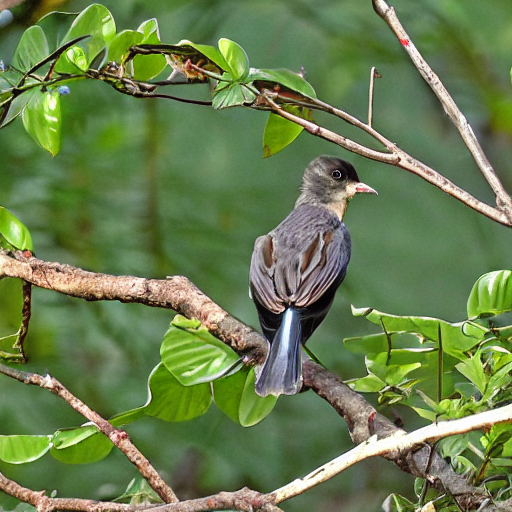

In [6]:

# 3. Execute Generation
my_prompt = "A bird in nandolal basu atyle"

generate_image(
    prompt=my_prompt, 
    model_path=MODEL_NAME, 
    output_path="generated_result.png", 
    lora_path=OUTPUT_DIR
)

Loading Base UNet...
Loading LoRA weights from /kaggle/working/lora_output_nandolal...
✅ LoRA weights successfully merged into UNet!


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating for prompt: A bird


  0%|          | 0/40 [00:00<?, ?it/s]

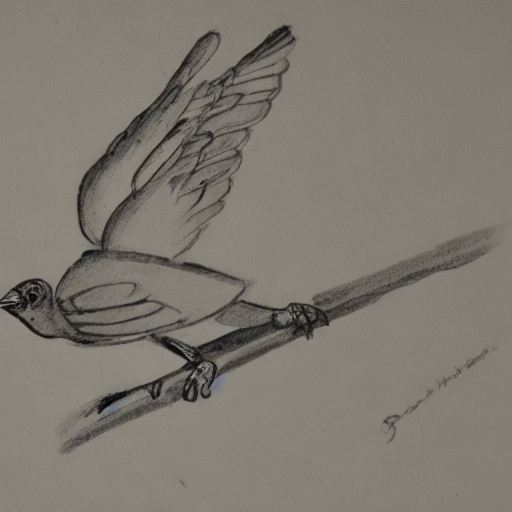

Saved to nandolal_style_result.png


In [8]:
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from peft import PeftModel
import torch
import os

# --- Configuration ---
# Must match your training folder
LORA_PATH = "/kaggle/working/lora_output_nandolal" 
BASE_MODEL = "stable-diffusion-v1-5/stable-diffusion-v1-5"

# 1. Load the Base UNet explicitly
print("Loading Base UNet...")
unet = UNet2DConditionModel.from_pretrained(
    BASE_MODEL, 
    subfolder="unet", 
    torch_dtype=torch.float16
)

# 2. Load the LoRA weights using PEFT (The Critical Fix)
print(f"Loading LoRA weights from {LORA_PATH}...")
try:
    # This matches the 'get_peft_model' logic from your training script
    unet = PeftModel.from_pretrained(unet, LORA_PATH)
    
    # Merge the weights into the model for faster speed & compatibility
    unet = unet.merge_and_unload()
    print("✅ LoRA weights successfully merged into UNet!")
except Exception as e:
    print(f"❌ Error loading LoRA: {e}")
    # Stop here if weights fail, otherwise you just get generic images again
    raise e

# 3. Create the Pipeline with the Fine-Tuned UNet
pipe = StableDiffusionPipeline.from_pretrained(
    BASE_MODEL,
    unet=unet, # We pass our modified UNet here
    torch_dtype=torch.float16,
    safety_checker=None # Optional: disables safety checker to save memory
).to("cuda")

# 4. Generate Image
# Use a prompt from your CSV 'image_title' column for best results
prompt = "A bird" 

print(f"Generating for prompt: {prompt}")
image = pipe(
    prompt, 
    num_inference_steps=40, 
    guidance_scale=7.5
).images[0]

# 5. Save and Display
output_path = "nandolal_style_result.png"
image.save(output_path)
display(image)
print(f"Saved to {output_path}")

In [ ]:
# 5. Save and Display
output_path = "nandolal_style_result.png"
image.save(output_path)
display(image)
print(f"Saved to {output_path}")

Generating for prompt: A village


  0%|          | 0/40 [00:00<?, ?it/s]

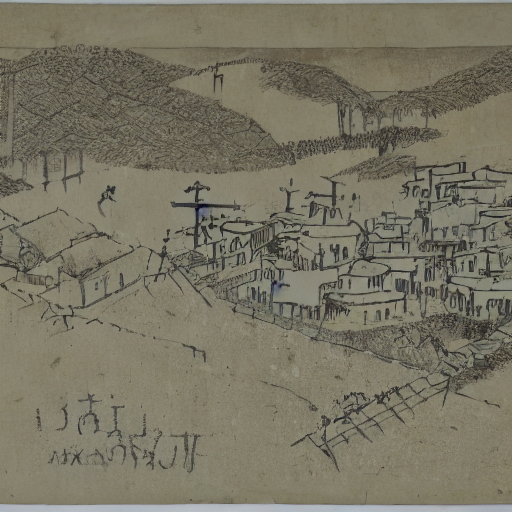

Saved to nandolal_style_result.png


In [15]:
 # 4. Generate Image
# Use a prompt from your CSV 'image_title' column for best results
prompt = "A village" 

print(f"Generating for prompt: {prompt}")
image = pipe(
    prompt, 
    num_inference_steps=40, 
    guidance_scale=7.5
).images[0]

# 5. Save and Display
output_path = "nandolal_style_result.png"
image.save(output_path)
display(image)
print(f"Saved to {output_path}")

In [12]:
import shutil
import os
from IPython.display import FileLink

# 1. Define the folder you want to download
folder_path = '/kaggle/working/lora_output_nandolal'

# 2. Define the name of the output zip file (without .zip extension)
output_filename = 'final-finetuned-model'

# 3. Check if the folder exists before trying to zip it
if os.path.exists(folder_path):
    print(f"Zipping folder: {folder_path}...")
    
    # Create the zip archive
    # base_name is the file to create, root_dir is the folder to zip
    shutil.make_archive(base_name=output_filename, format='zip', root_dir=folder_path)
    
    output_zip_file = output_filename + '.zip'
    
    print(f"Successfully created {output_zip_file}")
    print("Click the link below to download:")
    
    # 4. Generate a clickable download link
    display(FileLink(output_zip_file))
else:
    print(f"Error: The folder {folder_path} was not found.")

Zipping folder: /kaggle/working/lora_output_nandolal...
Successfully created final-finetuned-model.zip
Click the link below to download:


/kaggle/working/final-finetuned-model.zip